<a href="https://colab.research.google.com/github/Ment1984/zarouali-ment-khoualha/blob/main/Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

import pandas as pd
df = pd.read_excel("Online Retail.xlsx")
df.head()


Saving Online Retail.xlsx to Online Retail.xlsx


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# 1. Drop rows with missing CustomerID or InvoiceNo
df_cleaned = df.dropna(subset=['CustomerID', 'InvoiceNo'])

# 2. Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# 3. Reset the index
df_cleaned.reset_index(drop=True, inplace=True)

# 4. Optional: Remove negative quantities or prices (often returns or errors)
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

# 5. Add a TotalPrice column
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# 6. Summary check
print("Cleaned Data Shape:", df_cleaned.shape)
print("Missing values:\n", df_cleaned.isnull().sum())
print(df_cleaned.head())


Cleaned Data Shape: (392692, 9)
Missing values:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United

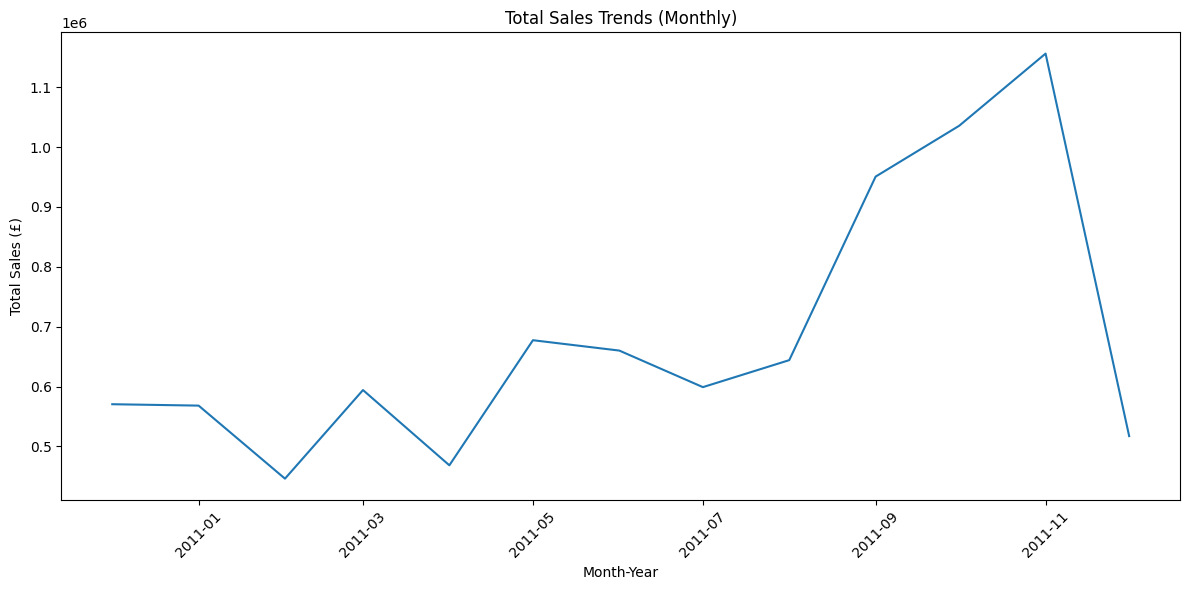

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# --- Total Sales Trends: Monthly sales over time ---
df_cleaned['MonthYear'] = df_cleaned['InvoiceDate'].dt.to_period('M')
monthly_sales = df_cleaned.groupby('MonthYear')['TotalPrice'].sum().reset_index()
monthly_sales['MonthYear'] = monthly_sales['MonthYear'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='MonthYear', y='TotalPrice')
plt.title('Total Sales Trends (Monthly)')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-8-a2c926f892e1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


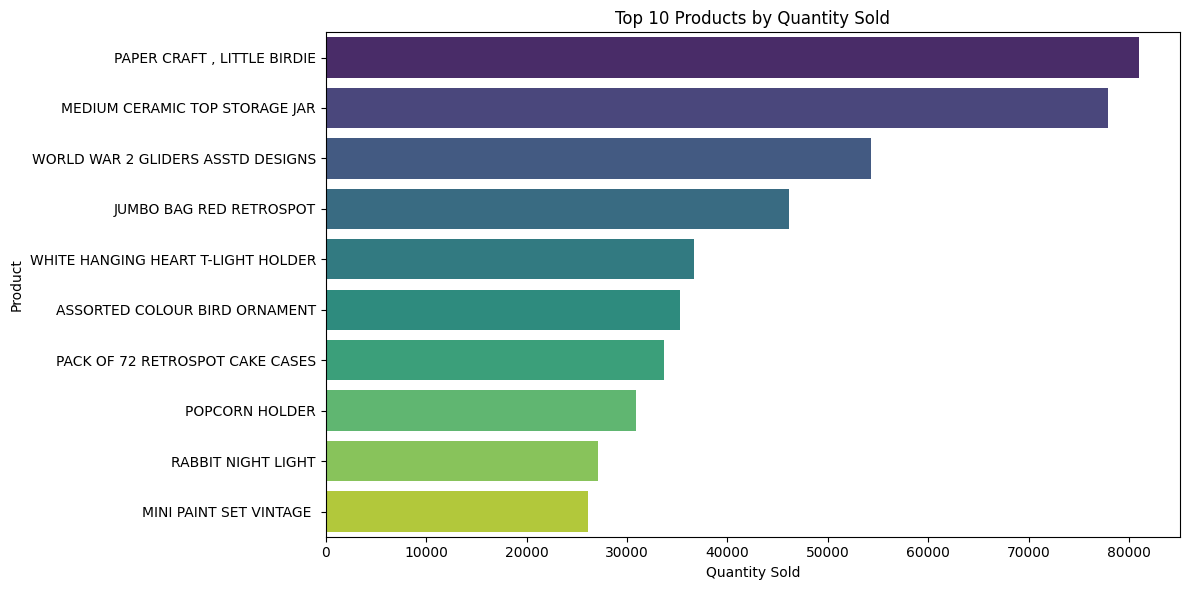

In [ ]:
top_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


<ipython-input-9-6f51daa808bc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index.astype(int), palette='magma')


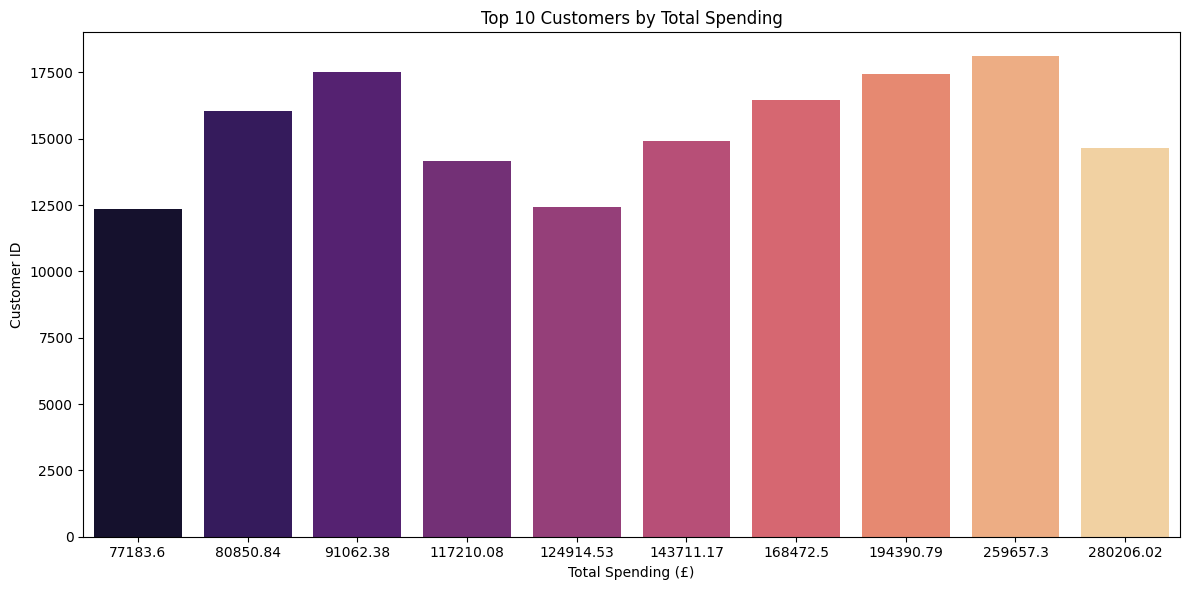

In [ ]:
# Top 10 Customers by Total Spending
top_customers = df_cleaned.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(int), palette='magma')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending (£)')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
import pandas as pd

# Correct way to load a CSV file
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show first few rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Import libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Step 1: Drop customerID
df.drop("customerID", axis=1, inplace=True)

# Step 2: Convert 'TotalCharges' to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Step 3: Encode target
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])  # Yes = 1, No = 0

# Step 4: One-hot encode categorical variables
X = df.drop("Churn", axis=1)
y = df["Churn"]
X = pd.get_dummies(X)

# Step 5: Scale data for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7154009936124911
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1036
           1       0.46      0.49      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.7615330021291696
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.55      0.51      0.53       373

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.69      1409
weighted avg       0.76      0.76      0.76      1409



In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.6962384669978708
              precision    recall  f1-score   support

           0       0.93      0.64      0.75      1036
           1       0.46      0.86      0.60       373

    accuracy                           0.70      1409
   macro avg       0.69      0.75      0.68      1409
weighted avg       0.80      0.70      0.71      1409



In [4]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [5]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Drop customerID
df.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric (handle errors)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing TotalCharges
df.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [8]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

dt_model = DecisionTreeClassifier().fit(X_train, y_train)
knn_model = KNeighborsClassifier().fit(X_train, y_train)
nb_model = GaussianNB().fit(X_train, y_train)


In [10]:
# Predict and get probability scores for AUC
dt_preds = dt_model.predict(X_test)
dt_probs = dt_model.predict_proba(X_test)[:, 1]

knn_preds = knn_model.predict(X_test)
knn_probs = knn_model.predict_proba(X_test)[:, 1]

nb_preds = nb_model.predict(X_test)
nb_probs = nb_model.predict_proba(X_test)[:, 1]


In [11]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Decision Tree
print("Decision Tree:")
print("Precision:", precision_score(y_test, dt_preds))
print("Recall:", recall_score(y_test, dt_preds))
print("AUC:", roc_auc_score(y_test, dt_probs))

# KNN
print("\nK-Nearest Neighbors:")
print("Precision:", precision_score(y_test, knn_preds))
print("Recall:", recall_score(y_test, knn_preds))
print("AUC:", roc_auc_score(y_test, knn_probs))

# Naive Bayes
print("\nNaive Bayes:")
print("Precision:", precision_score(y_test, nb_preds))
print("Recall:", recall_score(y_test, nb_preds))
print("AUC:", roc_auc_score(y_test, nb_probs))


Decision Tree:
Precision: 0.48370927318295737
Recall: 0.516042780748663
AUC: 0.6570758550714134

K-Nearest Neighbors:
Precision: 0.5992779783393501
Recall: 0.44385026737967914
AUC: 0.7362997033716241

Naive Bayes:
Precision: 0.5064935064935064
Recall: 0.7299465240641712
AUC: 0.8130878858627848
